In [91]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Data Cleaning

In [92]:
df = pd.read_csv('italian.csv')
df.columns = [i for i in range(df.shape[1])]
df = df.rename(columns={42: 'Output'})
df

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,Output
0,0.542458,0.749622,0.451677,0.734201,0.382207,0.615859,0.349990,0.489768,0.315243,0.381039,...,0.569984,0.587044,0.513611,0.599124,0.448963,0.579277,0.546451,0.560220,0.574589,a
1,0.537559,0.760660,0.449563,0.742025,0.382790,0.625299,0.349724,0.499426,0.320832,0.392158,...,0.586625,0.574040,0.527141,0.586675,0.452842,0.573892,0.548359,0.554266,0.586253,a
2,0.523065,0.843637,0.425072,0.795075,0.355708,0.657875,0.342291,0.521244,0.351712,0.415136,...,0.635645,0.634510,0.553329,0.609155,0.593771,0.574158,0.686569,0.579268,0.669514,a
3,0.482442,0.688557,0.382601,0.631467,0.327545,0.502156,0.317897,0.374413,0.318208,0.274231,...,0.509755,0.557243,0.456758,0.560664,0.384344,0.534863,0.473271,0.523812,0.525090,a
4,0.534754,0.851585,0.433690,0.791721,0.368271,0.649716,0.352665,0.515384,0.364662,0.405568,...,0.638960,0.645079,0.553244,0.619705,0.604162,0.580558,0.693465,0.583651,0.678713,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6422,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,y
6423,0.502702,0.657447,0.439814,0.617214,0.387045,0.499052,0.346895,0.405134,0.295392,0.341089,...,0.509728,0.560549,0.430781,0.558574,0.331189,0.554859,0.276308,0.548699,0.216145,y
6424,0.491836,0.644299,0.427189,0.609266,0.370449,0.502296,0.321689,0.409829,0.264611,0.344782,...,0.497078,0.539343,0.423128,0.536179,0.325674,0.534138,0.273278,0.530646,0.218348,y
6425,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,y


In [93]:
print("Uncleaned dataset shape =", df.shape)

Uncleaned dataset shape = (6427, 43)


In [94]:
# removing null values from our dataset

all_null_values = df[df.iloc[:, 0] == 0]
print("Number of null values =", len(all_null_values.index))

Number of null values = 2264


In [95]:
# dropping those null values from our dataset

df.drop(all_null_values.index, inplace=True)

In [96]:
df

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,Output
0,0.542458,0.749622,0.451677,0.734201,0.382207,0.615859,0.349990,0.489768,0.315243,0.381039,...,0.569984,0.587044,0.513611,0.599124,0.448963,0.579277,0.546451,0.560220,0.574589,a
1,0.537559,0.760660,0.449563,0.742025,0.382790,0.625299,0.349724,0.499426,0.320832,0.392158,...,0.586625,0.574040,0.527141,0.586675,0.452842,0.573892,0.548359,0.554266,0.586253,a
2,0.523065,0.843637,0.425072,0.795075,0.355708,0.657875,0.342291,0.521244,0.351712,0.415136,...,0.635645,0.634510,0.553329,0.609155,0.593771,0.574158,0.686569,0.579268,0.669514,a
3,0.482442,0.688557,0.382601,0.631467,0.327545,0.502156,0.317897,0.374413,0.318208,0.274231,...,0.509755,0.557243,0.456758,0.560664,0.384344,0.534863,0.473271,0.523812,0.525090,a
4,0.534754,0.851585,0.433690,0.791721,0.368271,0.649716,0.352665,0.515384,0.364662,0.405568,...,0.638960,0.645079,0.553244,0.619705,0.604162,0.580558,0.693465,0.583651,0.678713,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6419,0.450800,0.702960,0.366683,0.634161,0.297815,0.479500,0.251899,0.355692,0.188659,0.263218,...,0.571447,0.555012,0.395191,0.555414,0.261444,0.557029,0.199093,0.549250,0.131593,y
6420,0.482059,0.732263,0.406853,0.671034,0.349073,0.540677,0.301004,0.434735,0.246280,0.354361,...,0.566021,0.555368,0.520295,0.559486,0.412764,0.557032,0.363130,0.552024,0.319888,y
6421,0.469129,0.698315,0.390963,0.641003,0.337906,0.519773,0.292306,0.423692,0.243443,0.344865,...,0.532905,0.549104,0.521480,0.546646,0.417262,0.532111,0.374599,0.517909,0.336049,y
6423,0.502702,0.657447,0.439814,0.617214,0.387045,0.499052,0.346895,0.405134,0.295392,0.341089,...,0.509728,0.560549,0.430781,0.558574,0.331189,0.554859,0.276308,0.548699,0.216145,y


In [97]:
print("Cleaned dataset shape =", df.shape)

Cleaned dataset shape = (4163, 43)


## Data Preparation

In [98]:
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)

Features shape = (4163, 42)
Labels shape = (4163,)


## Data Split

In [99]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

## Model Making

In [100]:
svm = SVC(C=100, gamma=0.5, kernel='rbf')

In [101]:
svm.fit(x_train, y_train)

SVC(C=100, gamma=0.5)

In [102]:
print("Training score =", svm.score(x_train, y_train))

Training score = 0.9972972972972973


In [103]:
y_pred = svm.predict(x_test)

In [104]:
print("Testing score =", accuracy_score(y_test, y_pred))

Testing score = 0.9819927971188476


## Visualization

In [105]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')

In [106]:
f1, recall, precision

(0.9819927971188476, 0.9819927971188476, 0.9819927971188476)

In [107]:
labels = sorted(list(set(df['Output'])))
labels = [x.upper() for x in labels]

<AxesSubplot:title={'center':'Confusion Matrix - Italian Sign Language'}>

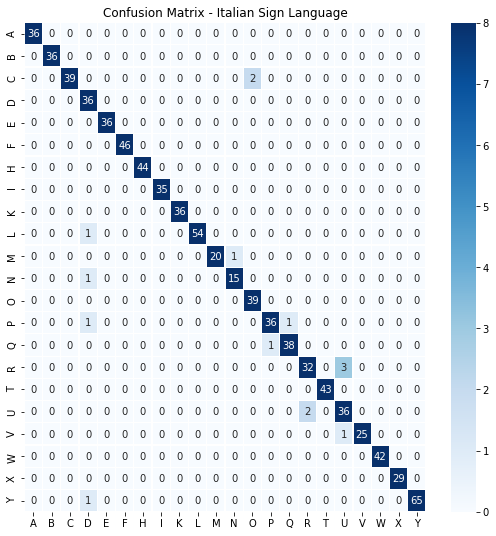

In [108]:
fig, ax = plt.subplots(figsize=(9, 9))

ax.set_title("Confusion Matrix - Italian Sign Language")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     ax=ax
                    )
maping

In [109]:
maping.figure.savefig("output.png")